# Laboratory Session 7
Alessandro Fella 2024285

In [162]:
library(latex2exp)

Warning message:
"package 'latex2exp' was built under R version 3.6.3"


## Exercise 1

What is the probability distribution of y, the number of times the new method fails to detect the disease? 
The probability distribution for y is the binomial one 
Frequentist estimator:  0.08 
Expected value = 0.08 with a variance of  0.0009813333 


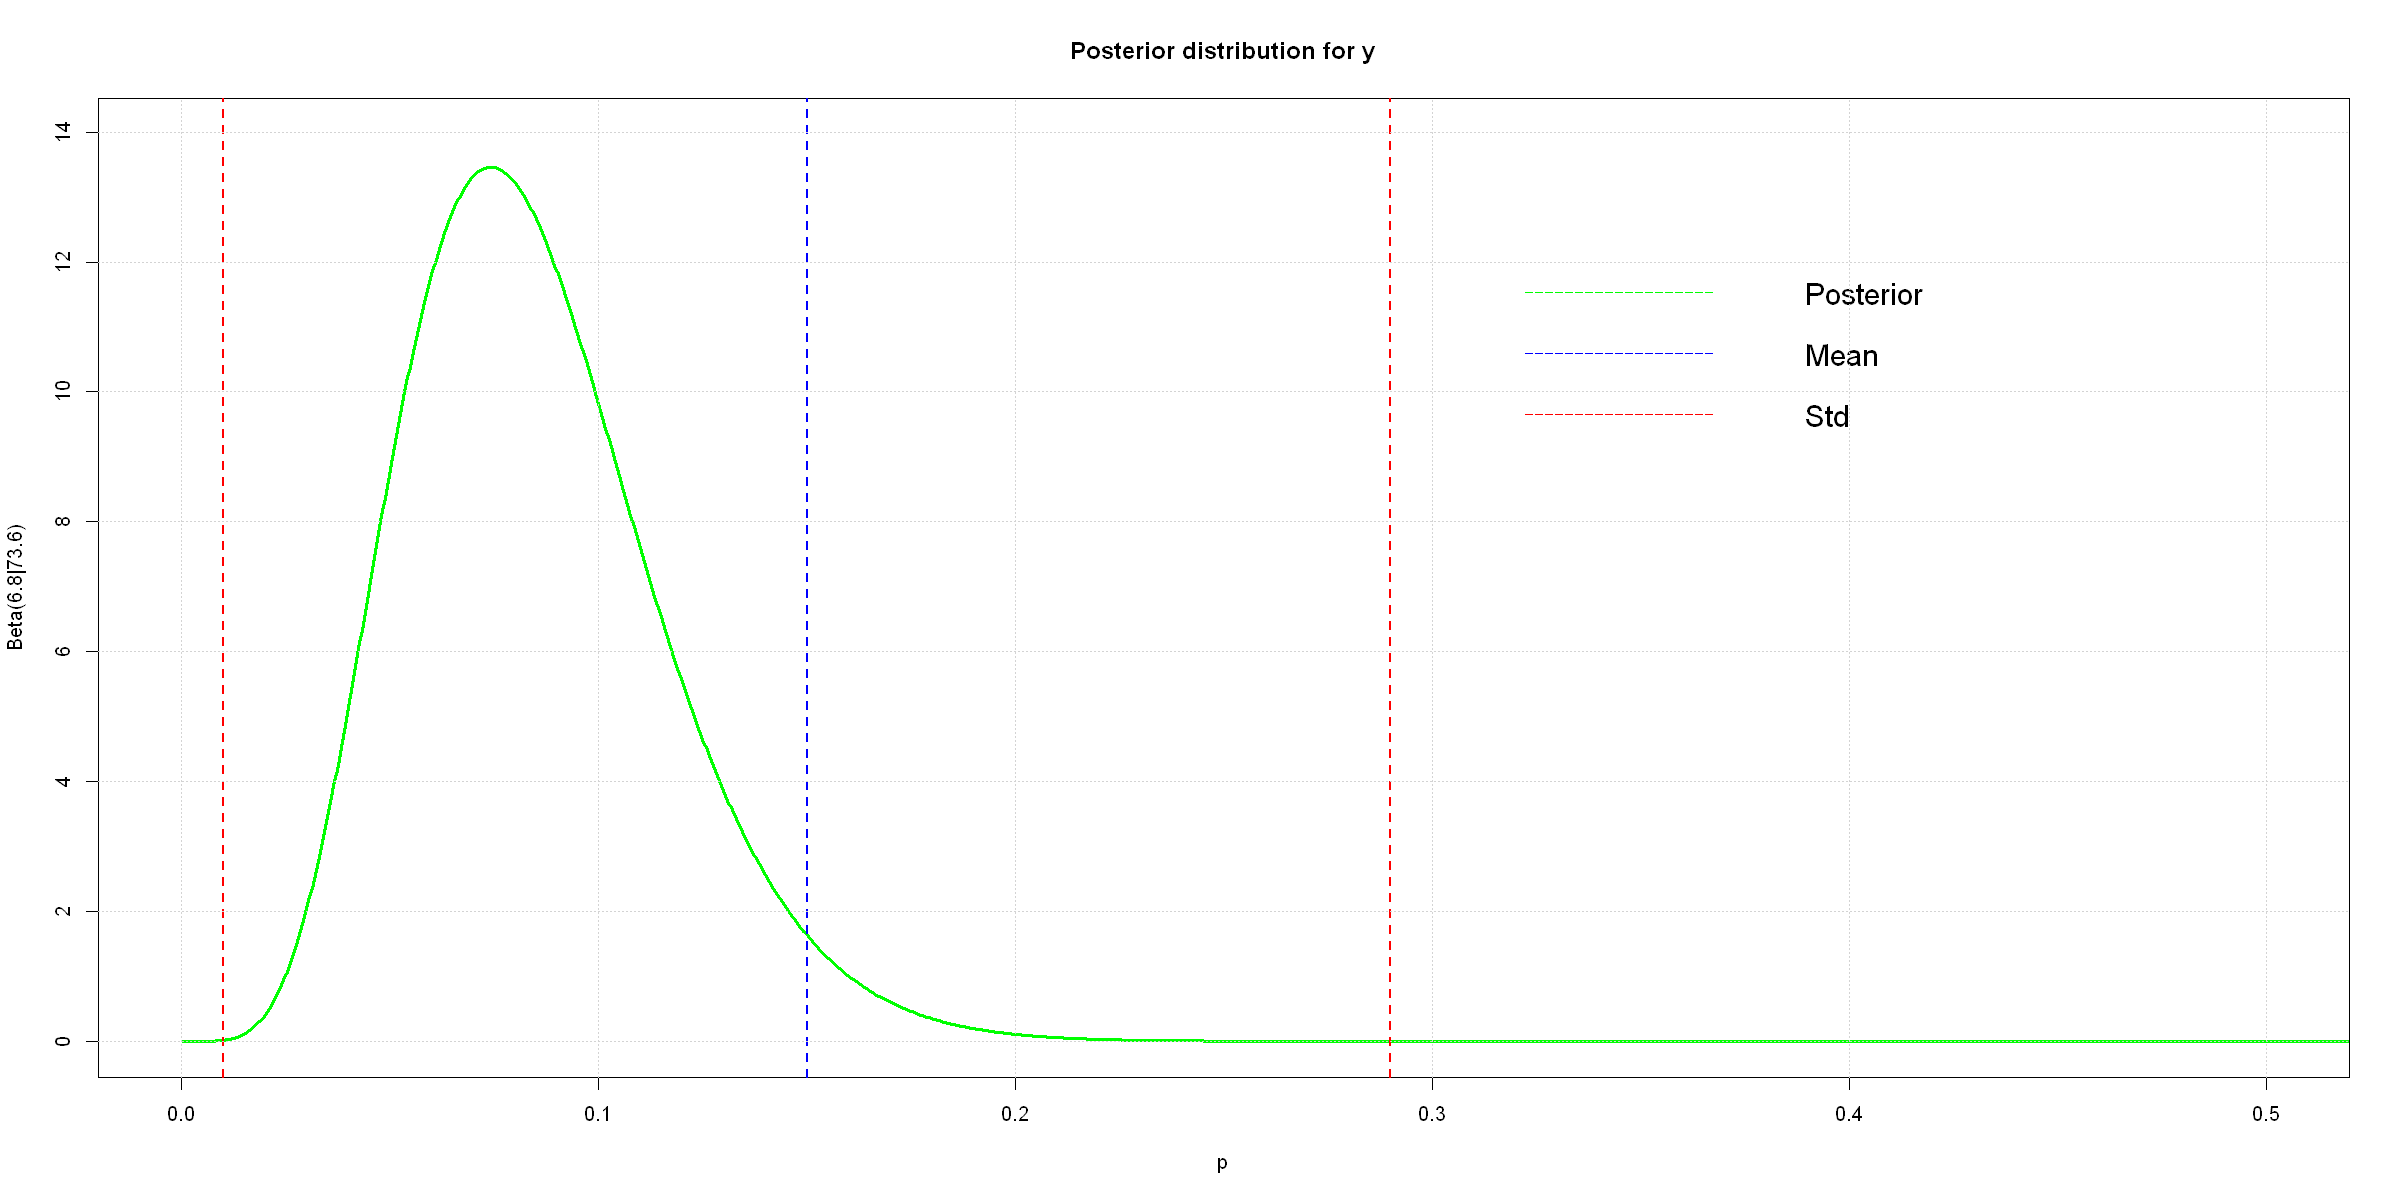

In [96]:
cat("What is the probability distribution of y, the number of times the new method fails to detect the disease?","\n")
cat(crayon::bold("The probability distribution for y is the binomial one","\n"))
#(b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is
#the frequentist estimator of the failure probability of the new method ?
n<-75
y<-6
freq_est<-y/n
expected_f<-y/n
var_f<-((1-expected_f)*expected_f)/n
cat("Frequentist estimator: ",freq_est,"\n")
cat("Expected value =",expected_f,"with a variance of ",var_f,"\n")

#(c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean
#value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot
#the mean value and variance

n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
dp<-(p[2]-p[1])
alpha.prior<-0.826
beta.prior<-4.681
prior<-dbeta(x=p,alpha.prior,beta.prior)
posterior<-dbeta(x=p,alpha.prior+y,beta.prior+n-y)

#Normalized prior and posterior
prior<-dbeta(x=p,alpha.prior,beta.prior)/(dp*sum(prior))
posterior<-dbeta(x=p,alpha.prior+y,beta.prior+n-y)/(dp*sum(posterior))
plot(p, posterior, col='green',xlab="p", type='l', ylim=c(0,max(posterior)+0.5),xlim =c(0,0.5),
     main = "Posterior distribution for y", lty=1, lwd = 3, 
     ylab='Beta(6.8|73.6)')
legend(0.3,max(posterior)-1, inset=0.05,legend=c("Posterior","Mean", "Std"), col=c("green","blue","red"), lty=5:5, cex=1.5,box.lty=0,bty = "n")

abline(v=0.15, lty=2,col='blue',lwd = 2)
abline(v=0.15+0.14, lty=2,col='red',lwd = 2)
abline(v=0.15-0.14, lty=2,col='red',lwd = 2)
grid()

Hypothesis test in the frequentist way: Acceptance region 
y = 6 lies in the acceptance region ==> we do not reject the NULL hypothesis 


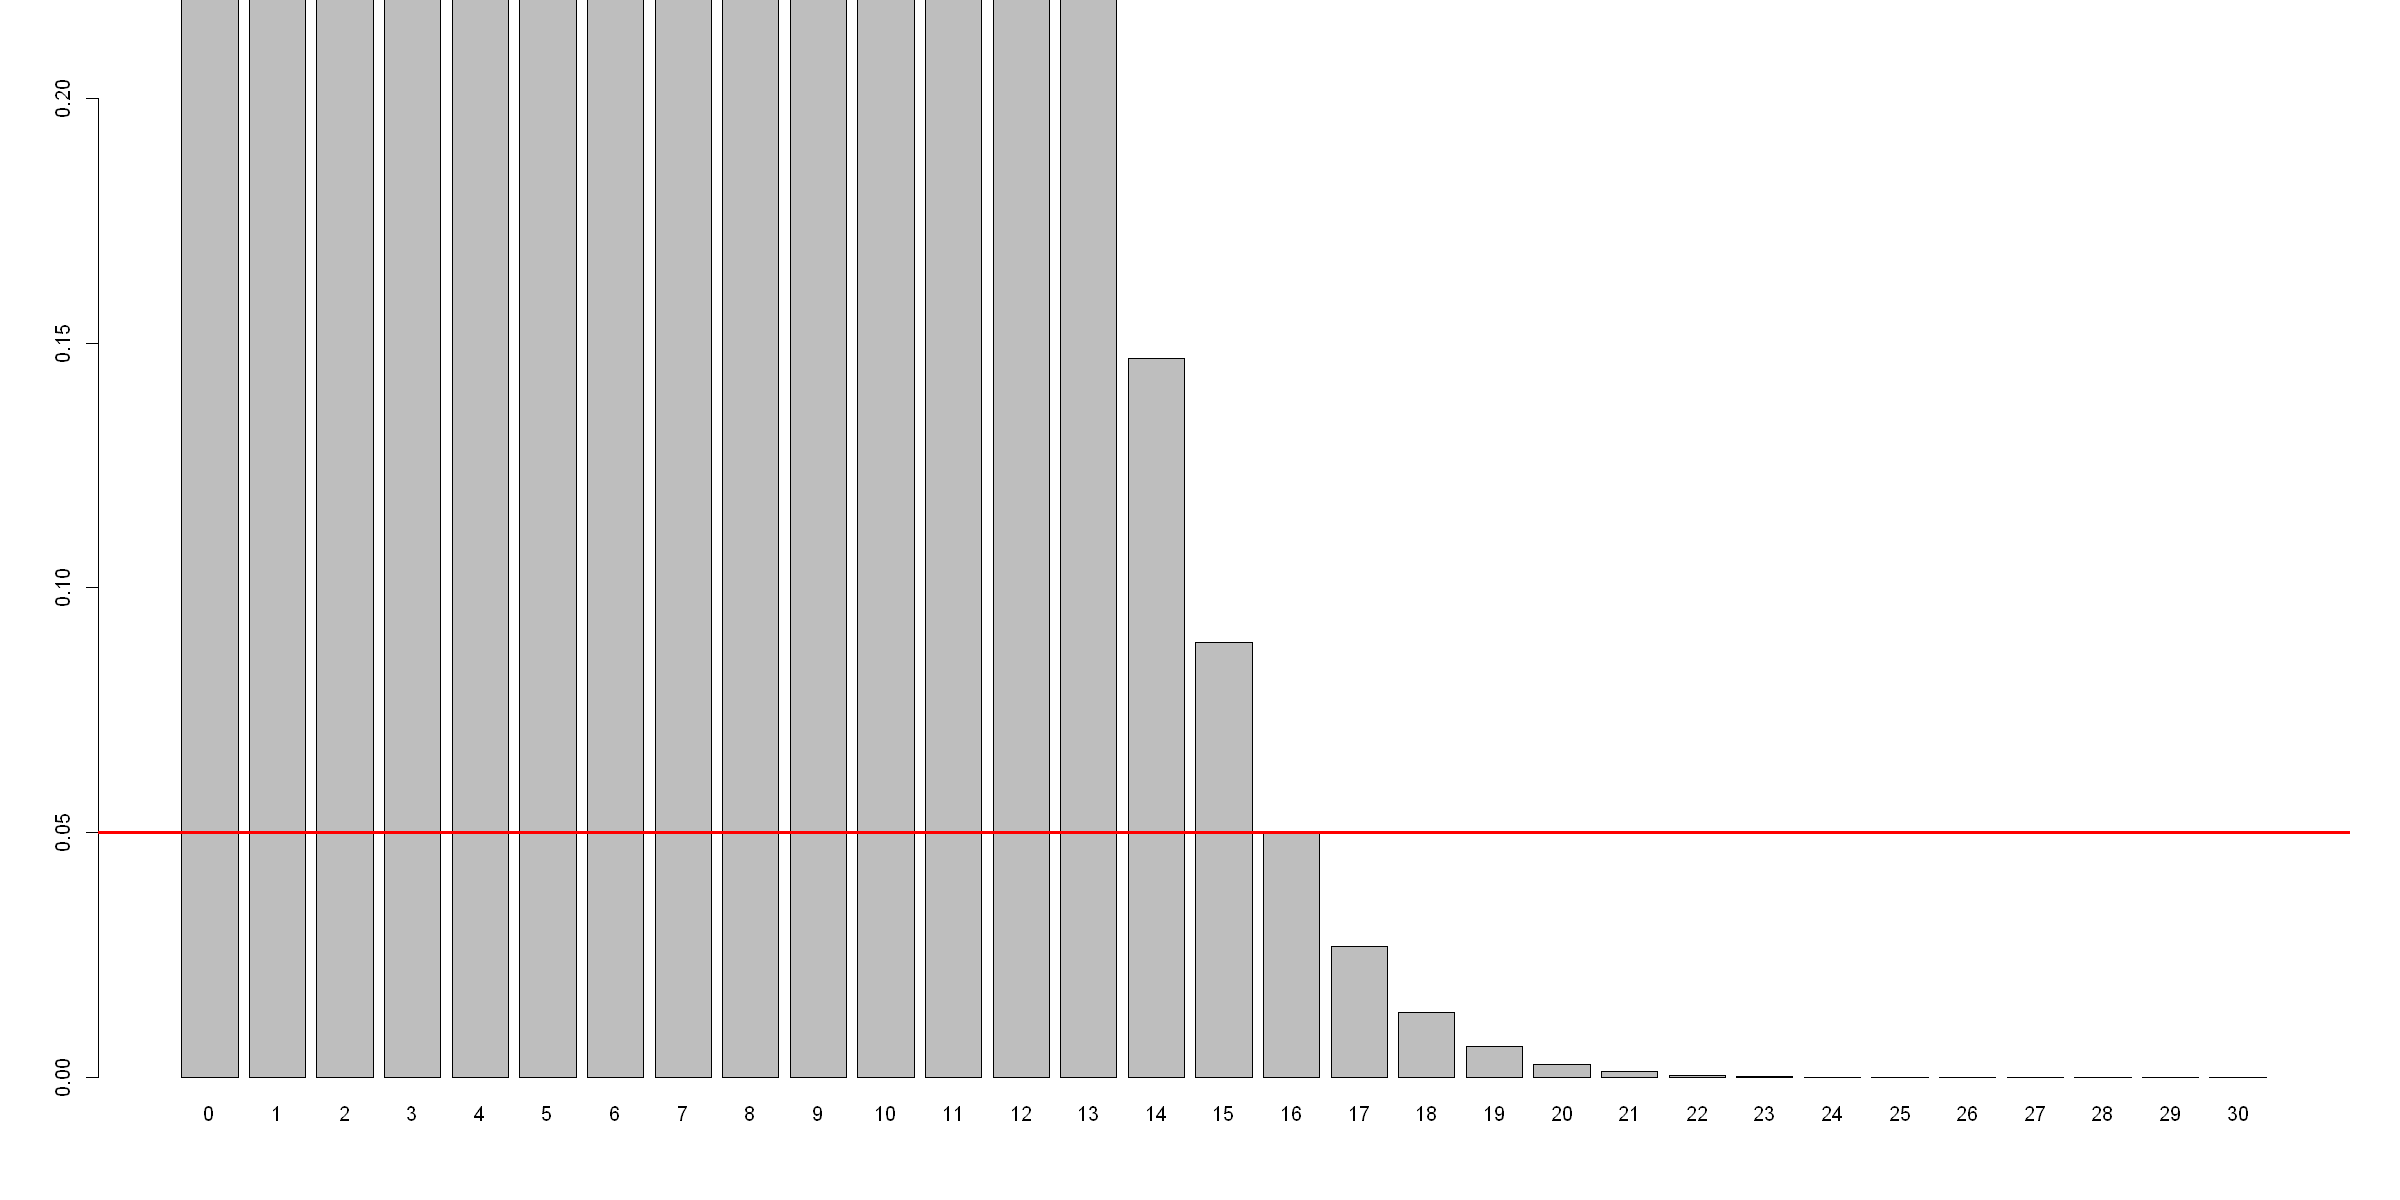

In [113]:
cat(crayon::bold("Hypothesis test in the frequentist way:"),"Acceptance region","\n")
p_0<-0.15
alpha<-0.05
x<-c(0:30)
null_hyp<-pbinom(x,n,p_0)
p_value<-sum(null_hyp)
barplot(1-null_hyp,names=x, ylim=c(0,0.2))
abline(h=0.05,lwd=3, col="red")
cat("y =",y,"lies in the acceptance region ==> we do not reject the NULL hypothesis","\n")

In [112]:
cat(crayon::bold("Hypothesis test in the frequentist way:"),"Fisher approach","\n")
binom.test(y,n,p_0)
cat("P-value =",0.1047," > ",alpha," ==> we do not reject the NULL hypothesis")

Hypothesis test in the frequentist way: Fisher approach 



	Exact binomial test

data:  y and n
number of successes = 6, number of trials = 75, p-value = 0.1047
alternative hypothesis: true probability of success is not equal to 0.15
95 percent confidence interval:
 0.02992514 0.16603687
sample estimates:
probability of success 
                  0.08 


P-value = 0.1047  >  0.05  ==> we do not reject the NULL hypothesis

In [118]:
f<-function(x){
posterior<-dbeta(x,6.826,73.681)
}
p_0<-0.15
P<-integrate(f,0,p_0)$value
cat(crayon::bold("Hypothesis test in the Bayesian way:"),"\n")
cat("P-value =",P*100,"% > ",alpha*100,"% ==> We cannot reject the NULL hypothesis at 5% level of significance")



Hypothesis test in the Bayesian way: 
P-value = 96.87201 % >  5 % ==> We cannot reject the NULL hypothesis at 5% level of significance

### Exercise 2

### Exercise 3

Frequentist approach 
Estimator:  0.09482759 
Expected value = 0.09482759 with a variance of  0.0007399596 
Bayesian approach 
Estimator:  0.09448819 
Posterior mean = 0.09448819 with a variance of 0.0007127966 
Credible interval: [x1= 0.05  ; x2= 0.1505 ]


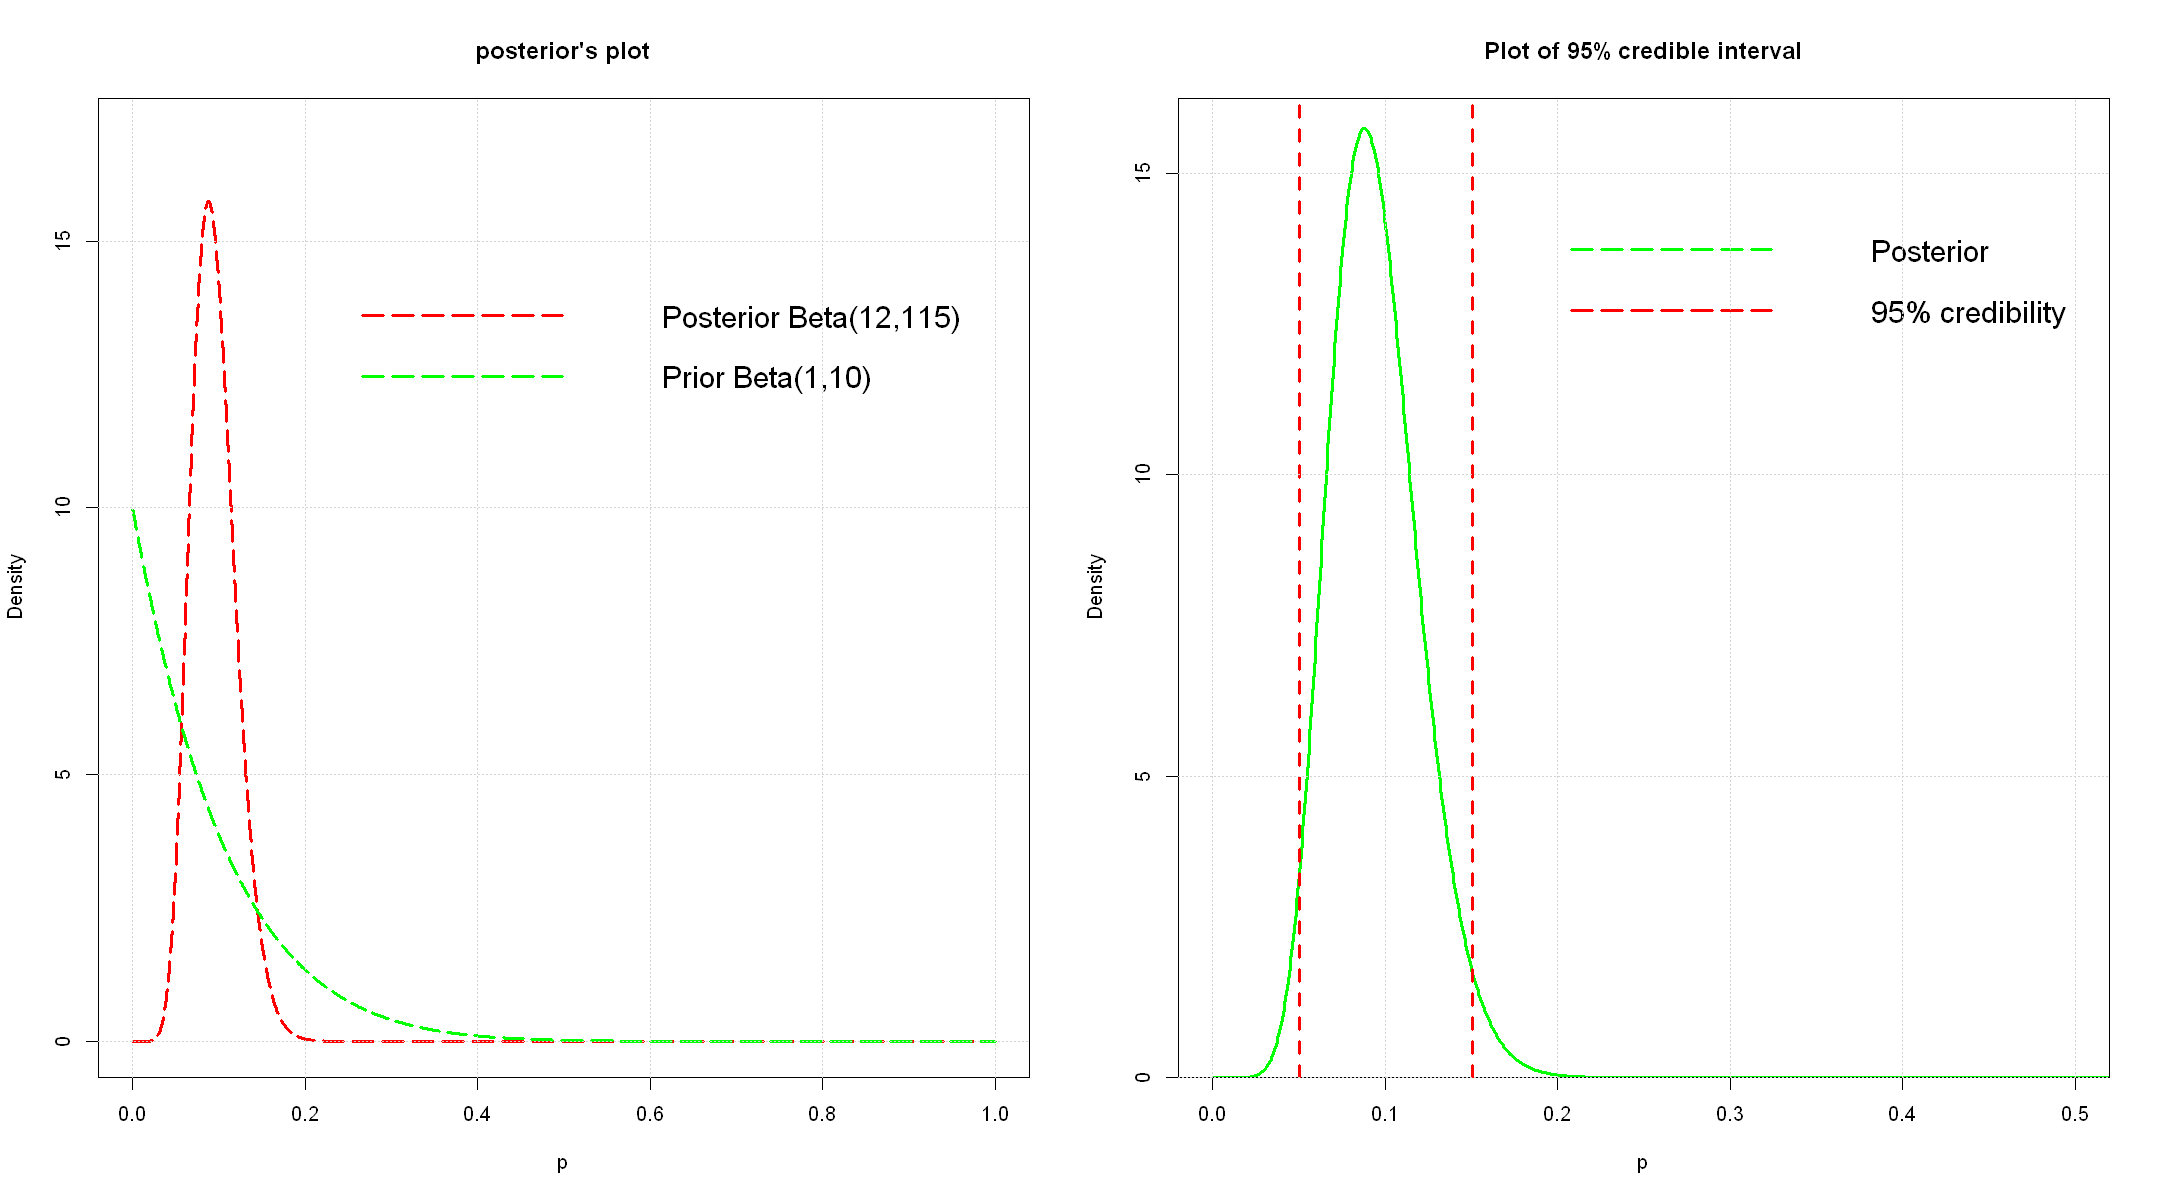

In [123]:
par(mfrow=c(1,2))
options(repr.plot.width=18, repr.plot.height=10)

n.samples<-116
y<-11
#a) find the frequentist estimator for p
estimator_p_freq<-y/n.samples
expected_f<-y/n.samples
var_f<-((1-expected_f)*expected_f)/n.samples
cat(crayon::bold("Frequentist approach","\n"))
cat("Estimator: ",estimator_p_freq,"\n")
cat("Expected value =",expected_f,"with a variance of ",var_f,"\n")
#(b) using a Beta(1, 10) prior for p, calculate and posterior distribution P(p|y)
alpha.prior<-1
beta.prior<-10
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample) 
dp<-(p[2]-p[1])
prior_p<-dbeta(x=p, alpha.prior, beta.prior)
post_p<-dbeta(x=p,alpha.prior+y,beta.prior+n.samples-y)
prior_p<-dbeta(x=p, alpha.prior, beta.prior)/((dp*sum(prior_p)))
post_p<-dbeta(x=p,alpha.prior+y,beta.prior+n.samples-y)/((dp*sum(post_p)))
plot(p, post_p, col='red', type='l',ylim=c(0,17),
     main = "posterior's plot", lty=5, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, prior_p, col='green', type='l',ylim=c(0,17),
     lty=5, lwd = 3, xlab="p", 
     ylab='Density')
legend(0.15,max(post_p)-1, inset=0.05,legend=c("Posterior Beta(12,115)","Prior Beta(1,10)"),
       col=c("red", "green"), lty=5:5, cex=1.5,lwd=3,
       box.lty=0,bty = "n")
grid()
#(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
post_mean<-(alpha.prior+y)/(alpha.prior+y+beta.prior+n.samples-y)
post_var<-(1/(n.samples+2))**2*n.samples*post_mean*(1-post_mean)
cat(crayon::bold("Bayesian approach","\n"))
cat("Estimator: ",post_mean,"\n")
cat("Posterior mean =",post_mean,"with a variance of",post_var,"\n")
conflvl = 0.95 
area <- delta.p*cumsum(post_p)


conflvl_func <- function(p,values,conflvl) {
            for(i in 1:(length(values)-1)){
                conflvl_sx <- (1-conflvl)/2           #0.025
                conflvl_dx <- conflvl+(1-conflvl)/2   #0.025
                if ( (values[i+1]>= conflvl_sx) & (values[i] <= conflvl_sx)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (values[i+1]>= conflvl_dx) & (values[i] <= conflvl_dx)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

conf <- conflvl_func(p,area,conflvl)
cat("Credible interval: [x1=", conf[1]," ; x2=",conf[2],']\n')


plot(p, post_p, xaxs='r', yaxs='i', col='green',xlab="p", type='l', ylim=c(0,max(post_p)+0.5),xlim =c(0,0.5),
     main = "Plot of 95% credible interval", lty=1, lwd = 3, 
     ylab='Density')
legend(0.15,max(post_p)-1, inset=0.05,legend=c("Posterior","95% credibility"), col=c("green","red"), lty=5:5, cex=1.5,box.lty=0,lwd=3,bty = "n")

abline(v=conf[1], lty=2,col='red',lwd = 3)
abline(v=conf[2], lty=2,col='red',lwd = 3)
grid()

The value of P_0 = 0.1 lies inside the  95 % credible interval, we do not reject the null hypothesis

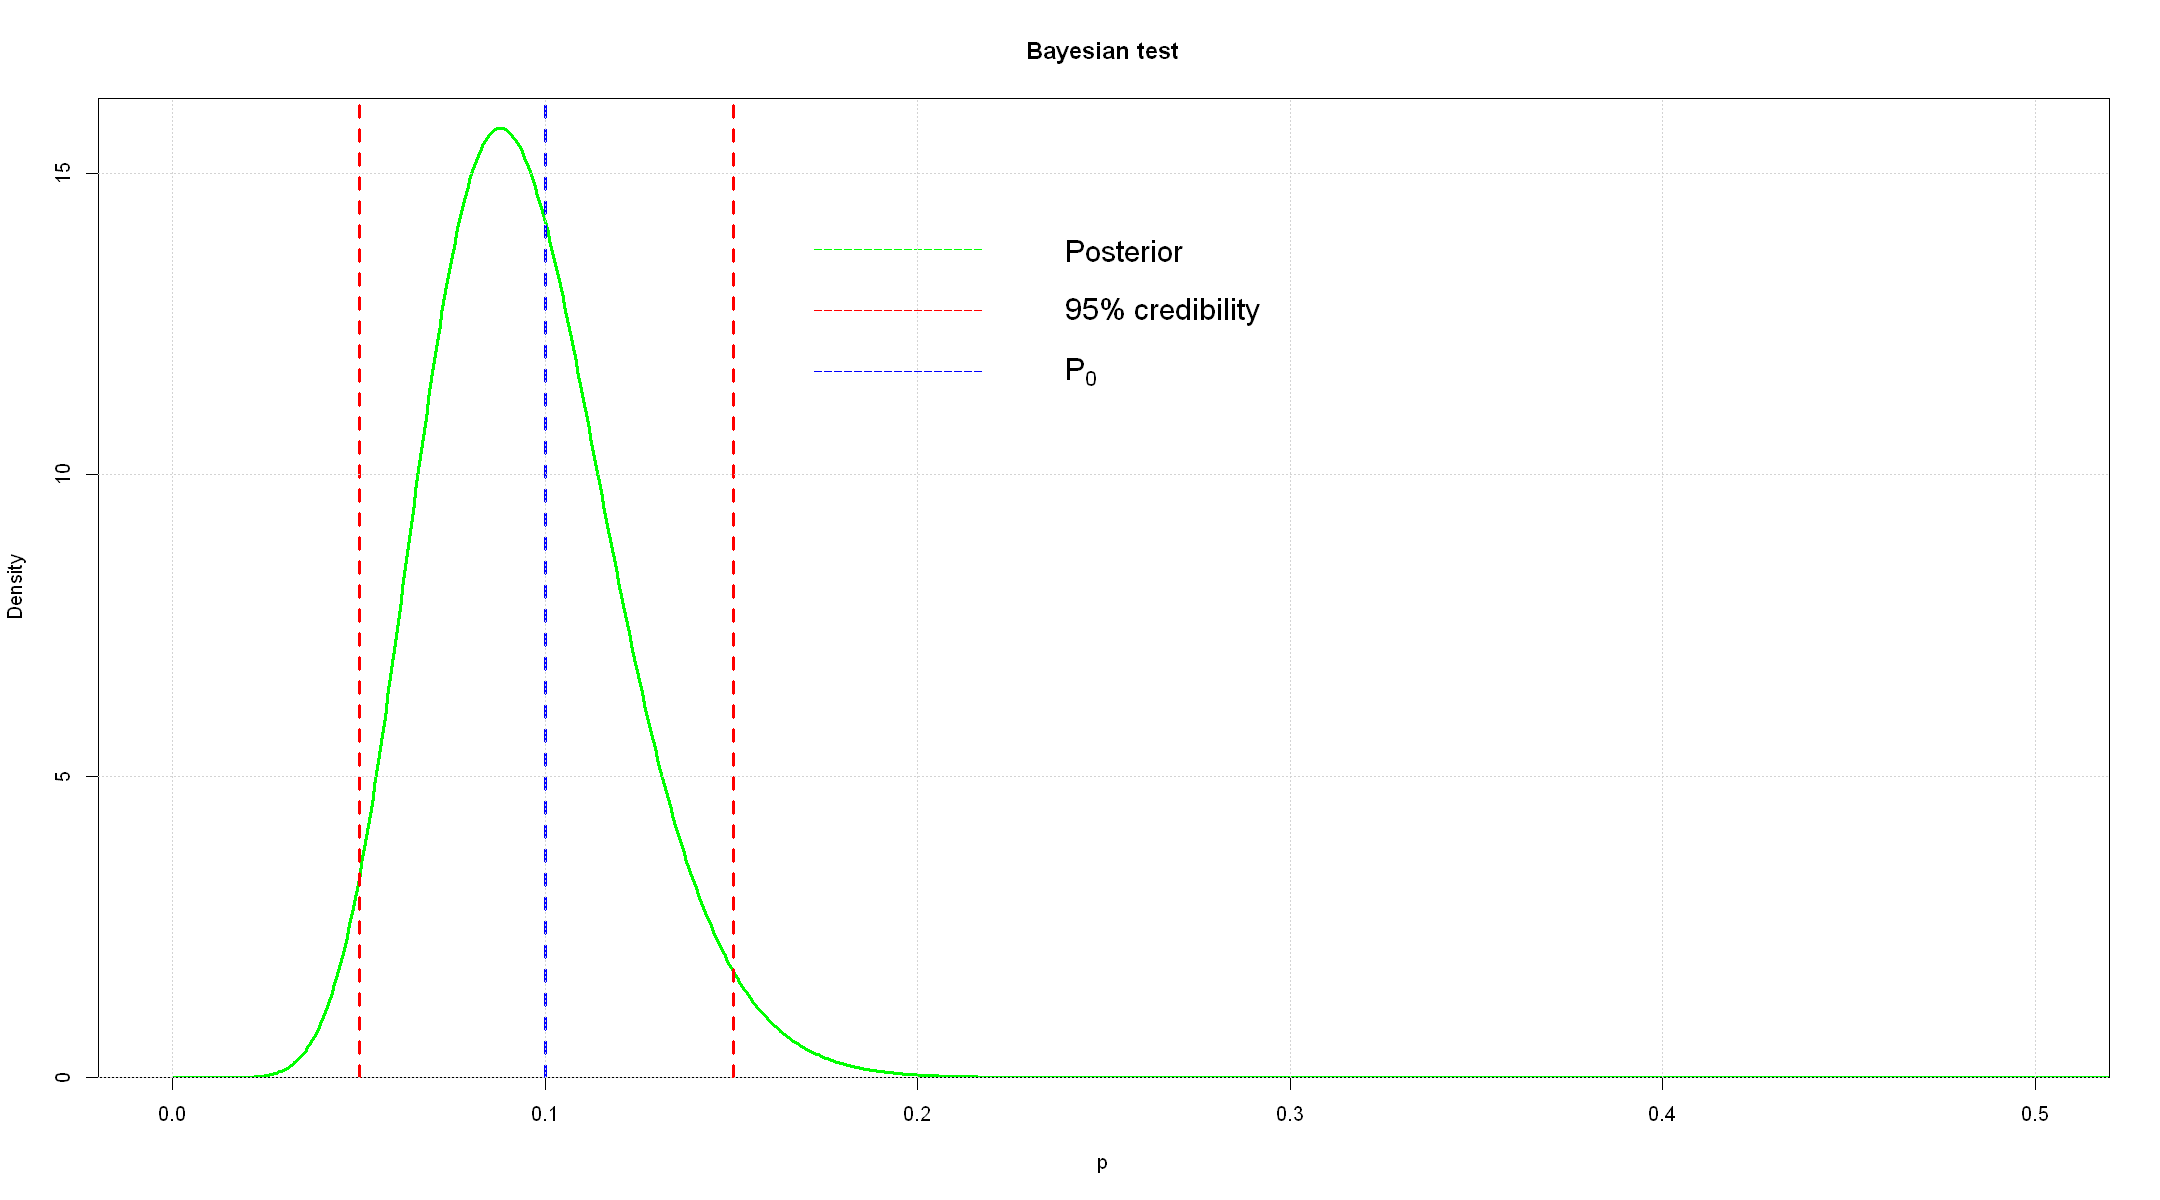

In [17]:
#(d)Bayesian test the hypotesis

p_0<-0.1
plot(p, post_p, xaxs='r', yaxs='i', col='green',xlab="p", type='l', ylim=c(0,max(post_p)+0.5),xlim =c(0,0.5),
     main = "Bayesian test", lty=1, lwd = 3, 
     ylab='Density')
legend(0.15,max(post_p)-1, inset=0.05,legend=c("Posterior","95% credibility",TeX("$P_0$")), col=c("green","red","blue"), lty=5:5, cex=1.5,box.lty=0,bty = "n")

abline(v=conf[1], lty=2,col='red',lwd = 3)
abline(v=conf[2], lty=2,col='red',lwd = 3)
abline(v=p_0, lty=2,col='blue',lwd = 3)
grid()
cat("The value of P_0 =",p_0,"lies inside the ",conflvl*100,"% credible interval, we do not reject the null hypothesis")
#(d)Frequentist test the hypotesis (Fisher's way)

cl.discrete.func <- function(p,cumsum.area,cl) {
                                                x1 <- NULL 
                                                x2 <- NULL 
                                                for(i in 1:(length(cumsum.area)-1)){
                                                    cl1 <- (1-cl)/2 
                                                    cl2 <- cl+(1-cl)/2 
                                                    if ( (cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)) { 
                                                        x1 <- p[i] # rounds to the nearest integer that’s smaller than x area.1 <- cumsum.area[i]
                                                    } 
                                                    if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) { 
                                                        x2 <- p[i+1] # rounds to the nearest integer that’s larger than x area.2 <- 1 - cumsum.area[i+1] 
                                                    } 
                                                } 
                                                return(c(x1,x2,area.1,area.2)) 
                                                }

# d <- pbinom(p, size=n.sample, prob=y/n.sample)
# cat(crayon::bold("Frequentist (Fisher's way) test:","\n"))
# cat("The result (",d,") is higher than alpha's value, we cannot reject the null hypothesis")



Frequentist approach 
Estimator:  0.05454545 
Expected value = 0.05454545 with a variance of  0.000312547 
Bayesian approach 
First case : Beta(10,166) 
Posterior mean = 0.05681818  and variance: 0.0003170544 
Credible interval: [x1= 0.0275  ; x2= 0.095 ]
Second case : Beta(21,271) 
Posterior mean = 0.07191781  and variance: 0.000394888 
Credible interval: [x1= 0.045  ; x2= 0.104 ]


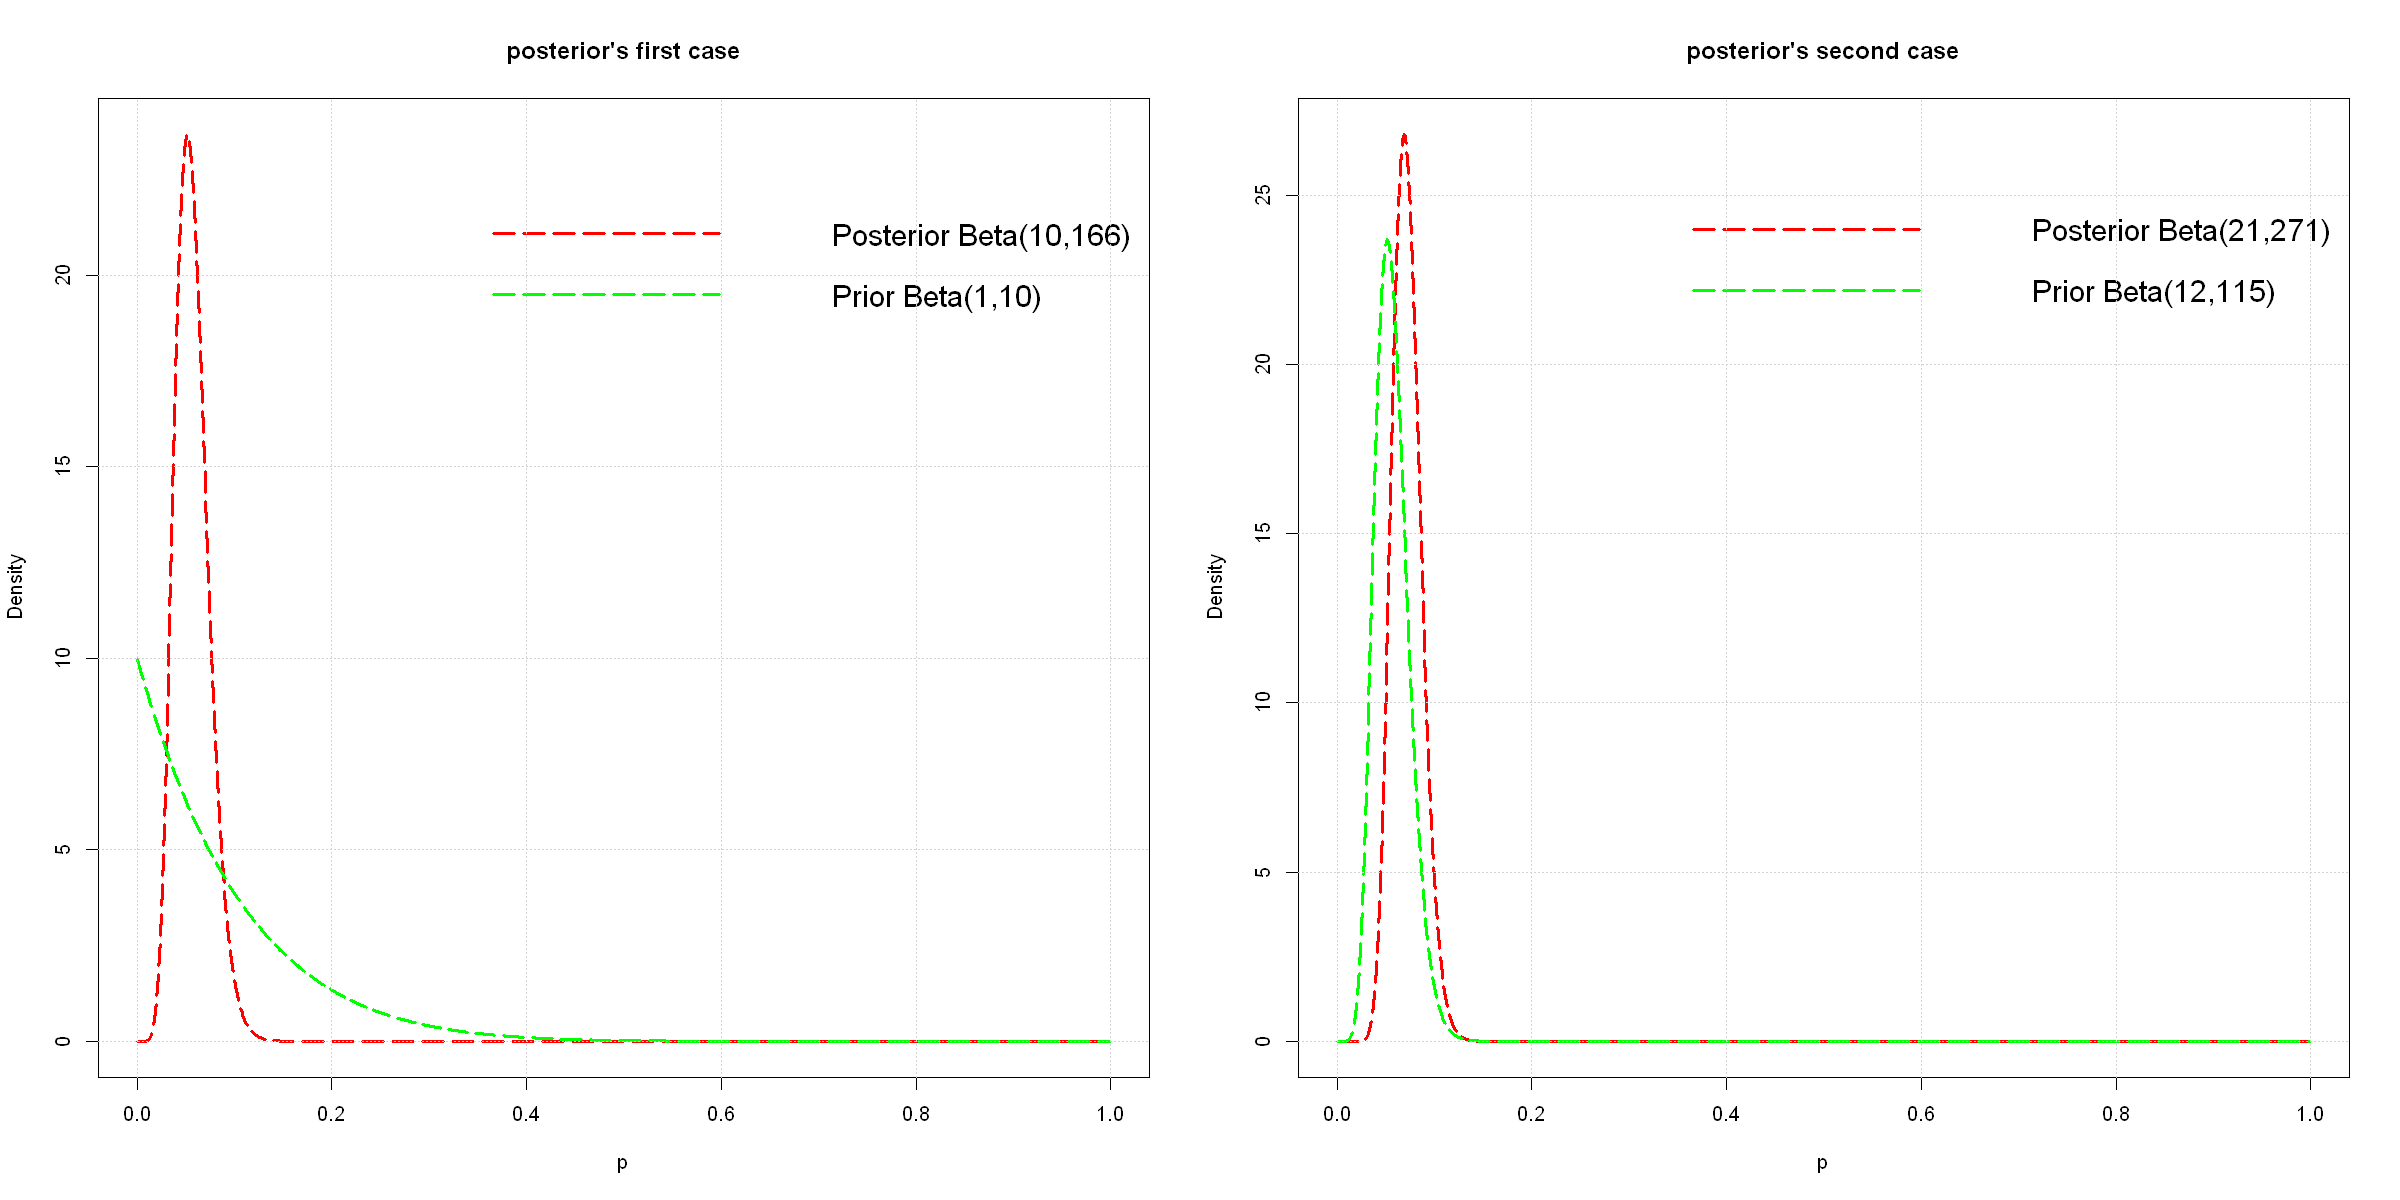

In the first case the value of P_0 = 0.15 lies outside the  95 % credible interval, we reject the null hypothesis 
In the second case the value of P_0 = 0.15 lies inside the  95 % credible interval, we do not reject the null hypothesis 


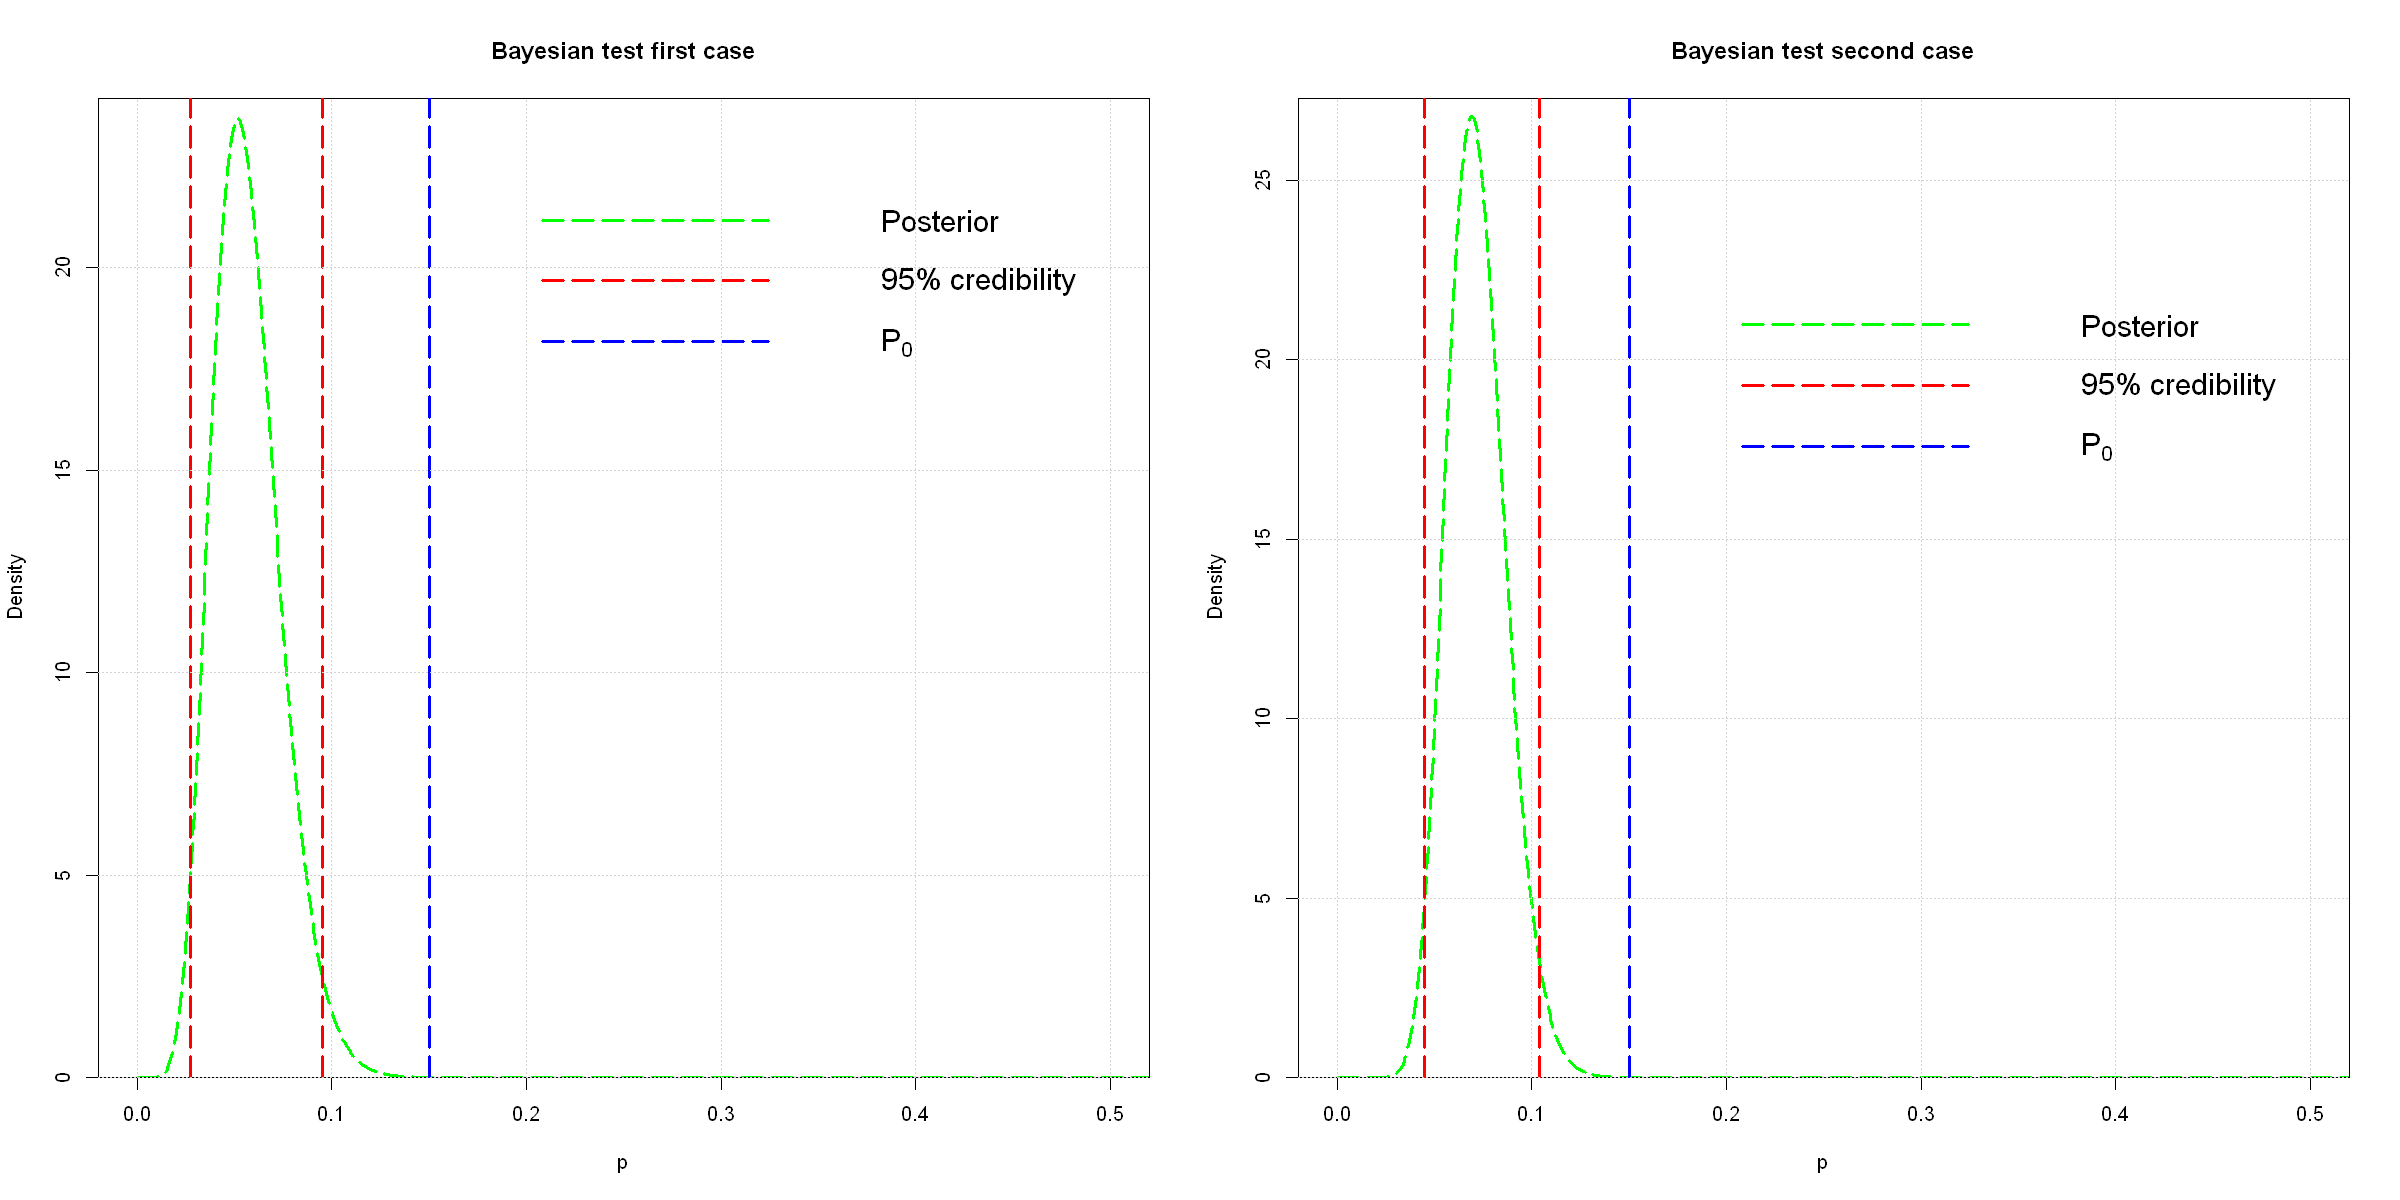

In [132]:
par(mfrow=c(1,2))

#(e) find the frequentist estimator for p
new.n.samples<-165
new.y<-9
estimator_p_freq_new<-new.y/new.n.samples
expected_f_new<-new.y/new.n.samples
var_f<-((1-expected_f_new)*expected_f_new)/new.n.samples
cat(crayon::bold("Frequentist approach","\n"))
cat("Estimator: ",estimator_p_freq_new,"\n")
cat("Expected value =",expected_f_new,"with a variance of ",var_f,"\n")

#(f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
#probability of the older measurement as the prior for the new one.
alpha.prior<-1
beta.prior<-10
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample) 
prior_p<-dbeta(x=p, alpha.prior, beta.prior)
post_p<-dbeta(x=p,alpha.prior+new.y,beta.prior+new.n.samples-new.y)
#normalized ones
prior_p<-dbeta(x=p, alpha.prior, beta.prior)/(dp*sum(prior_p))
post_p<-dbeta(x=p,alpha.prior+new.y,beta.prior+new.n.samples-new.y)/(dp*sum(post_p))

new_prior<-post_p
new.alpha<-alpha.prior+y
new.beta<-beta.prior+n.samples-y
new_post<-dbeta(x=p,new.alpha+new.y,new.beta+new.n.samples-new.y)
#normalized one
new_post<-dbeta(x=p,new.alpha+new.y,new.beta+new.n.samples-new.y)/(dp*sum(new_post))
options(repr.plot.width=20, repr.plot.height=10)
plot(p, post_p, col='red', type='l',ylim=c(0,max(post_p)),
     main = "posterior's first case", lty=5, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, prior_p, col='green', type='l',ylim=c(0,17),
     lty=5, lwd = 3, xlab="p", 
     ylab='Density')
legend(0.25,max(post_p)-1, inset=0.05,legend=c("Posterior Beta(10,166)","Prior Beta(1,10)"),
       col=c("red", "green"), lty=5:5, cex=1.5,lwd=3,
       box.lty=0,,bty = "n")
grid()
plot(p, new_post, col='red', type='l',ylim=c(0,max(new_post)),
     main = "posterior's second case", lty=5, lwd = 3, xlab="p", 
     ylab='Density')
lines(p, new_prior, col='green', type='l',ylim=c(0,new_post),
     lty=5, lwd = 3, xlab="p", 
     ylab='Density')
legend(0.25,max(new_post)-1, inset=0.05,legend=c("Posterior Beta(21,271)","Prior Beta(12,115)"),
       col=c("red", "green"), lty=5:5, cex=1.5,lwd=3,
       box.lty=0,,bty = "n")
grid()
#(g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
post_mean<-(alpha.prior+new.y)/(alpha.prior+new.y+beta.prior+new.n.samples-new.y)
post_var<-(1/(new.n.samples+2))**2*new.n.samples*post_mean*(1-post_mean)
post_mean_new<-(new.alpha+new.y)/(new.alpha+new.y+new.beta+new.n.samples-new.y)
post_var_new<-(1/(new.n.samples+2))**2*new.n.samples*post_mean_new*(1-post_mean_new)


par(mfrow=c(1,2))
conflvl = 0.95 
area_1 <- delta.p*cumsum(post_p)
area_2 <- delta.p*cumsum(new_post)

conf_1 <- conflvl_func(p,area_1,conflvl)
conf_2 <- conflvl_func(p,area_2,conflvl)
cat(crayon::bold("Bayesian approach","\n"))
cat(crayon::bold("First case"),": Beta(10,166)", "\n")
cat("Posterior mean =",post_mean," and variance:",post_var,"\n")
cat("Credible interval: [x1=", conf_1[1]," ; x2=",conf_1[2],']\n')
cat(crayon::bold("Second case"),": Beta(21,271)", "\n")
cat("Posterior mean =",post_mean_new," and variance:",post_var_new,"\n")
cat("Credible interval: [x1=", conf_2[1]," ; x2=",conf_2[2],']\n')

plot(p, post_p, xaxs='r', yaxs='i', col='green',xlab="p", type='l', ylim=c(0,max(post_p)+0.5),xlim =c(0,0.5),
     main = "Bayesian test first case", lty=5, lwd = 3, 
     ylab='Density')
legend(0.15,max(post_p)-1, inset=0.05,legend=c("Posterior","95% credibility",TeX("$P_0$")), col=c("green","red","blue"),lwd=3, lty=5:5:5, cex=1.5,box.lty=0,bty = "n")

abline(v=conf_1[1], lty=5,col='red',lwd = 3)
abline(v=conf_1[2], lty=5,col='red',lwd = 3)
abline(v=p_0, lty=5,col='blue',lwd = 3)
grid()

plot(p, new_post, xaxs='r', yaxs='i', col='green',xlab="p", type='l', ylim=c(0,max(new_post)+0.5),xlim =c(0,0.5),
     main = "Bayesian test second case", lty=5, lwd = 3, 
     ylab='Density')
legend(0.15,max(post_p)-1, inset=0.05,legend=c("Posterior","95% credibility",TeX("$P_0$")), col=c("green","red","blue"), lty=5:5:5,lwd=3, cex=1.5,box.lty=0,bty = "n")

abline(v=conf_2[1], lty=5,col='red',lwd = 3)
abline(v=conf_2[2], lty=5,col='red',lwd = 3)
abline(v=p_0, lty=5,col='blue',lwd = 3)
grid()
cat(crayon::bold("In the first case"),"the value of P_0 =",p_0,"lies outside the ",conflvl*100,"% credible interval, we reject the null hypothesis","\n")
cat(crayon::bold("In the second case"),"the value of P_0 =",p_0,"lies inside the ",conflvl*100,"% credible interval, we do not reject the null hypothesis","\n")


### Esempio slides freq hyp test

In [61]:
y<-8
n<-10
p_0<-0.6

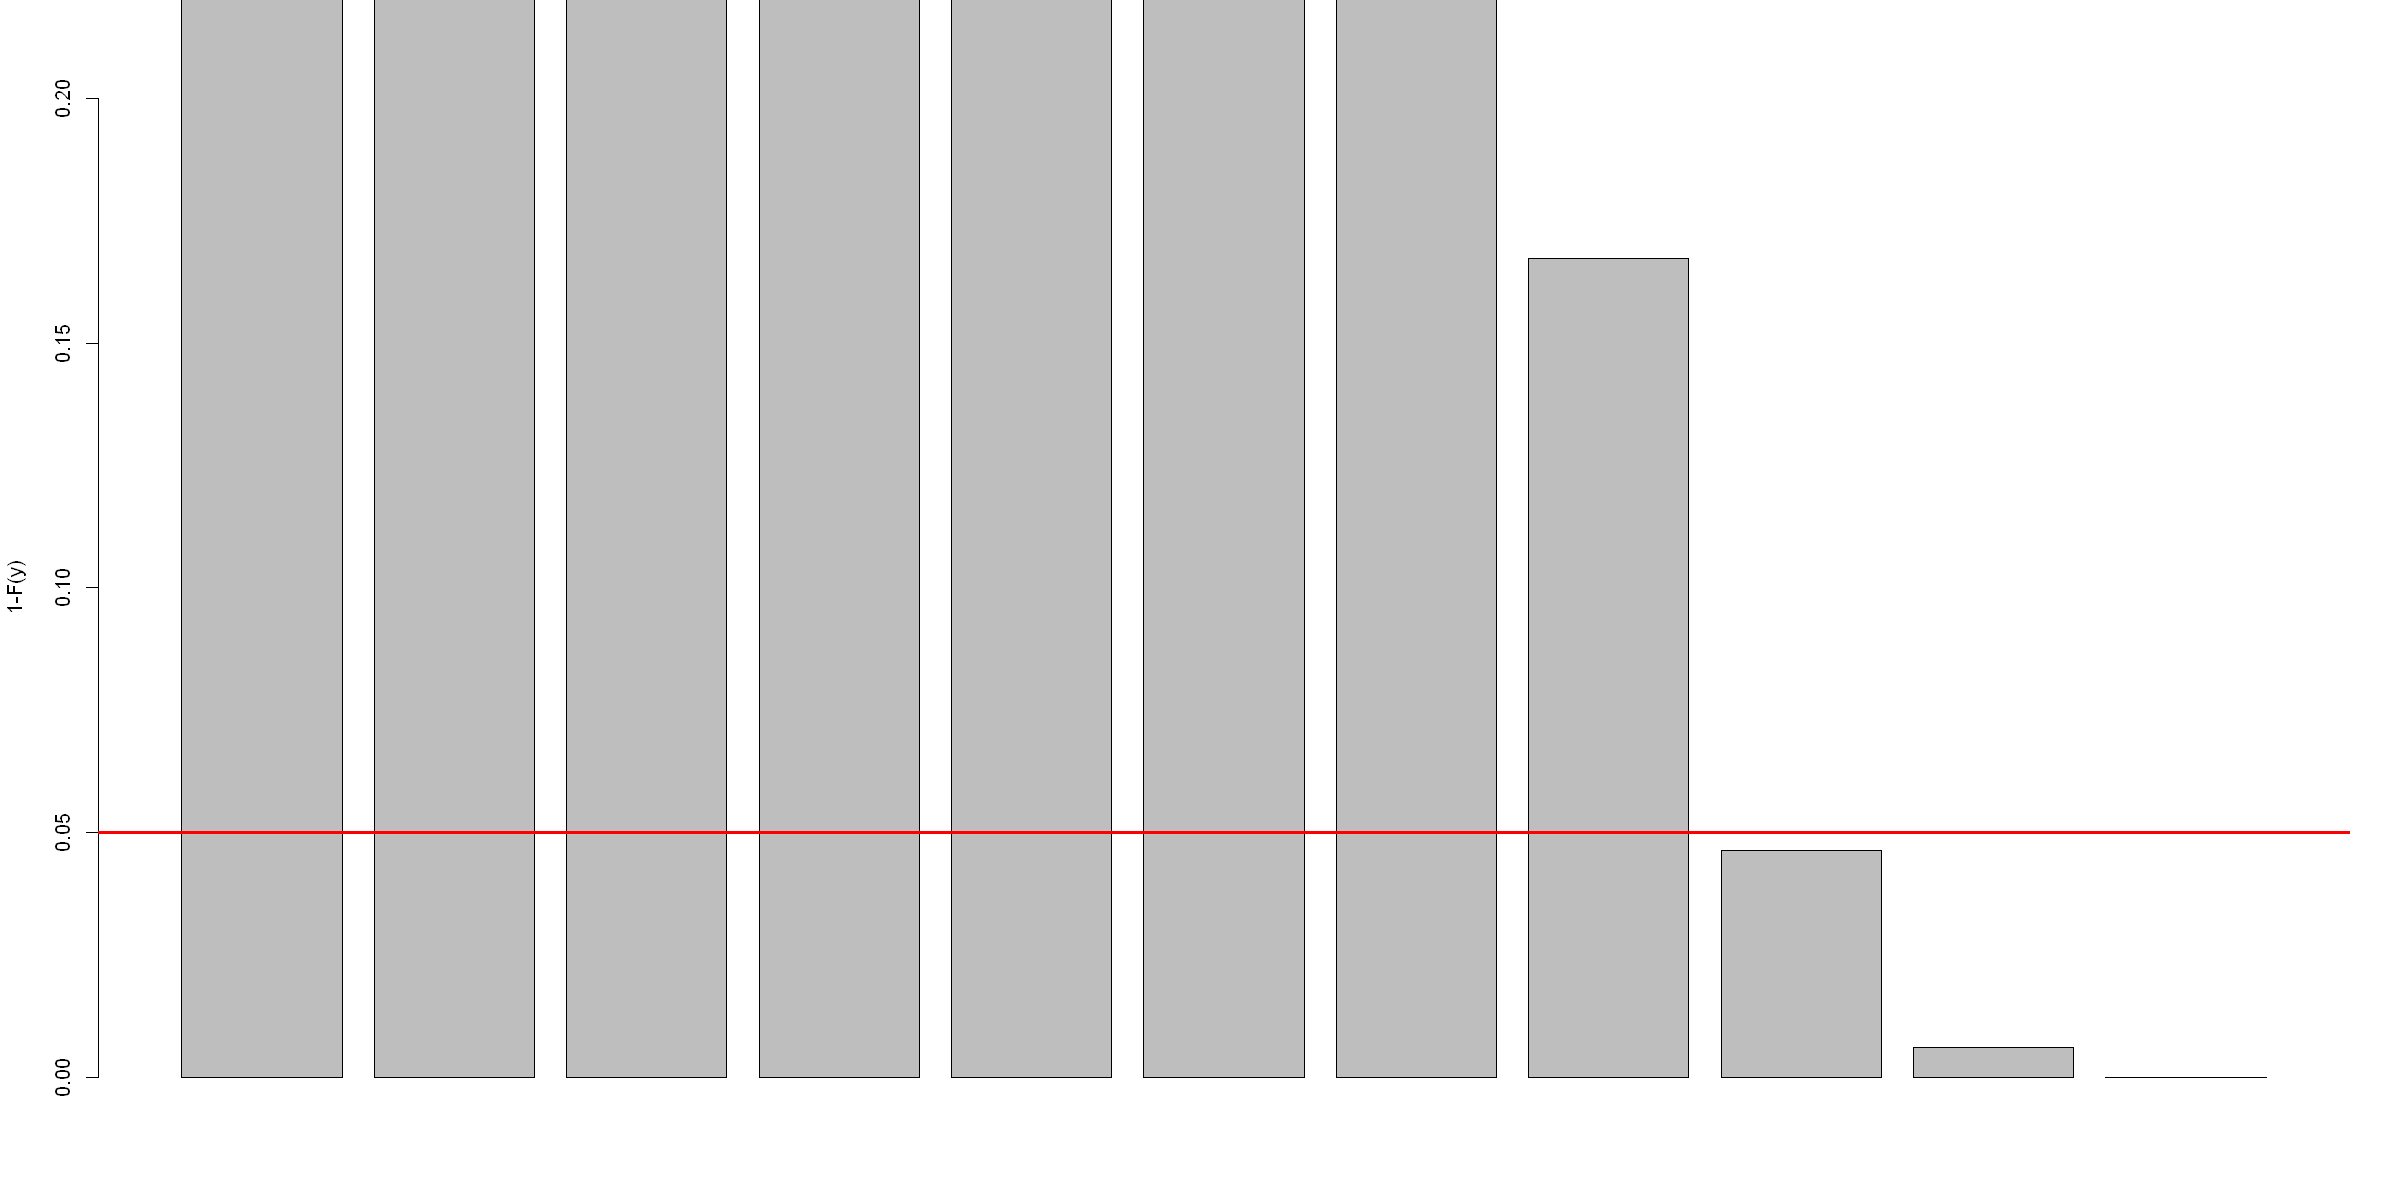

In [80]:
null_dist<-pbinom(0:10,n,p_0)
number<-c(0:10)
barplot(1-null_dist,ylim=c(0,0.2),axis.lty=1,y="1-F(y)")

abline(h=0.05,lwd=3, col="red")

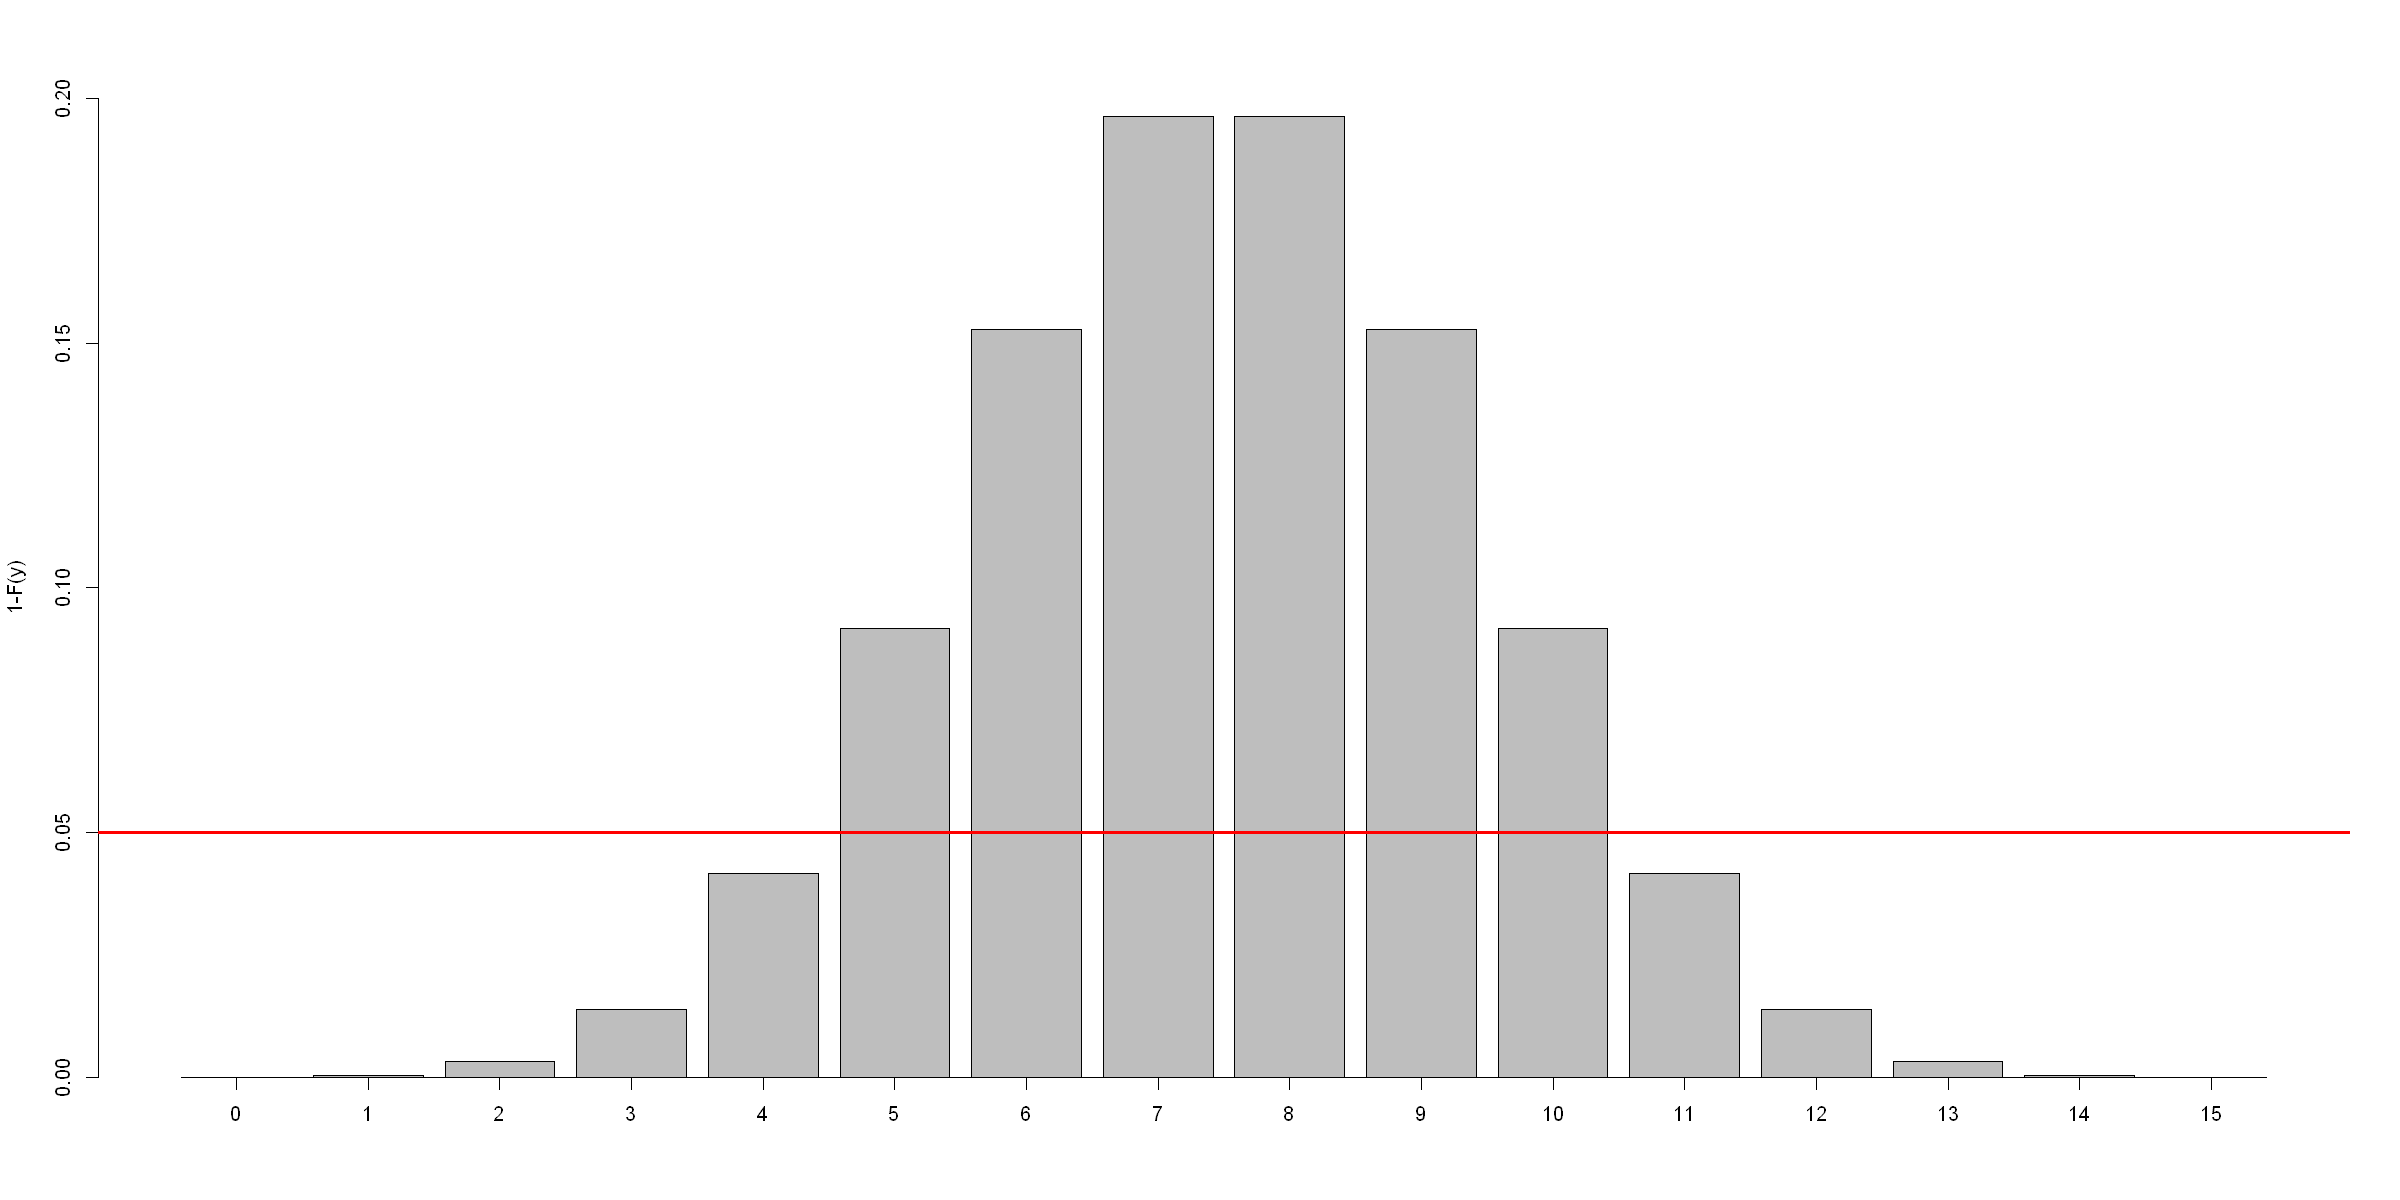

In [88]:
y<-0:15
n<-15
p_0<-0.5
null_dist<-dbinom(0:15,n,p_0)
barplot(null_dist,names=y,ylim=c(0,.2),axis.lty=1,y="1-F(y)")

abline(h=0.05,lwd=3, col="red")